## Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn import under_sampling , over_sampling
from sklearn.model_selection import train_test_split
from collections import Counter

In [2]:
# Load Data
data = pd.read_csv('loan_data.csv')
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
len(data)

9578

#### to check if the data have null values , There are no null values


In [4]:
data.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

#### to get the number of unique values in data columns 


In [5]:
data.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

#### to get the five-number summary (mean , median , first second third  quatile ) + std , max , min , it found that the data have diifferent scales like "int.rate" max = .21 and "installment" max  = 940 , we should use standard or maxmin scalers 

In [6]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
data['int.rate'].max()

0.2164

In [8]:
data['installment'].max()

940.14

# Data Visualization


#### The data is imbalanced there are 3 ways to handing this problem (1) under-sampling (2) over-sampling (3) smote , if we use over-sampling we will lose the data thus we will use under-sampling 

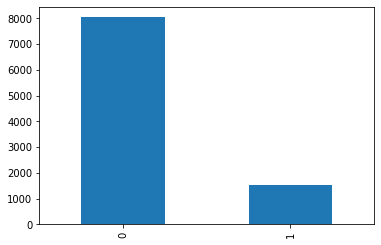

In [9]:
data['not.fully.paid'].value_counts().plot(kind= 'bar')

In [10]:
data['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [11]:
numofzero  = 100 * (data['not.fully.paid'].value_counts()[0]/len(data))
numofone  = 100 * (data['not.fully.paid'].value_counts()[1]/len(data))

print(f' The percentage of zero = {numofzero}')
print(f' The percentage of one = {numofone}')

 The percentage of zero = 83.99457089162664
 The percentage of one = 16.005429108373356


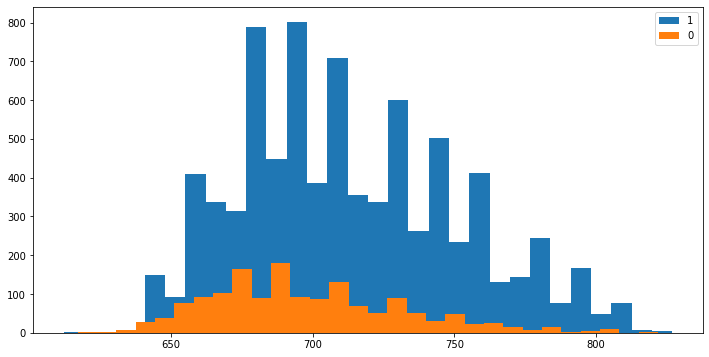

In [12]:
plt.figure(figsize=(12,6))
plt.hist(data[data['not.fully.paid'] == 0]['fico'] , bins = 30 , label="1")
plt.hist(data[data['not.fully.paid'] == 1]['fico'] , bins = 30 , label = "0")
plt.legend(['1','0'])

### if we look at the data columns we will found that there is one categorical column   

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


#### Lets plot this column using seaborn library , it found that porpose colmun have 7 values 

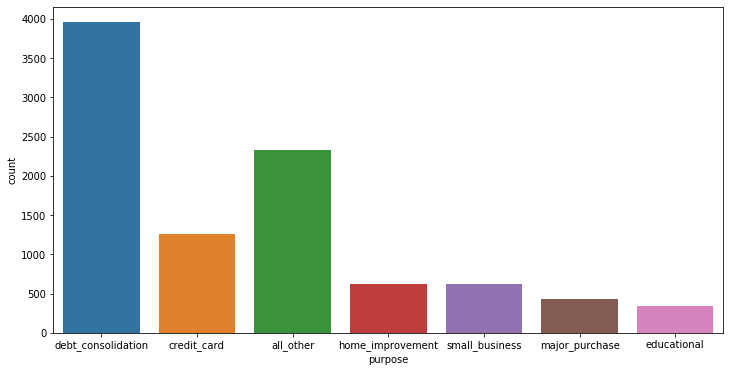

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='purpose')

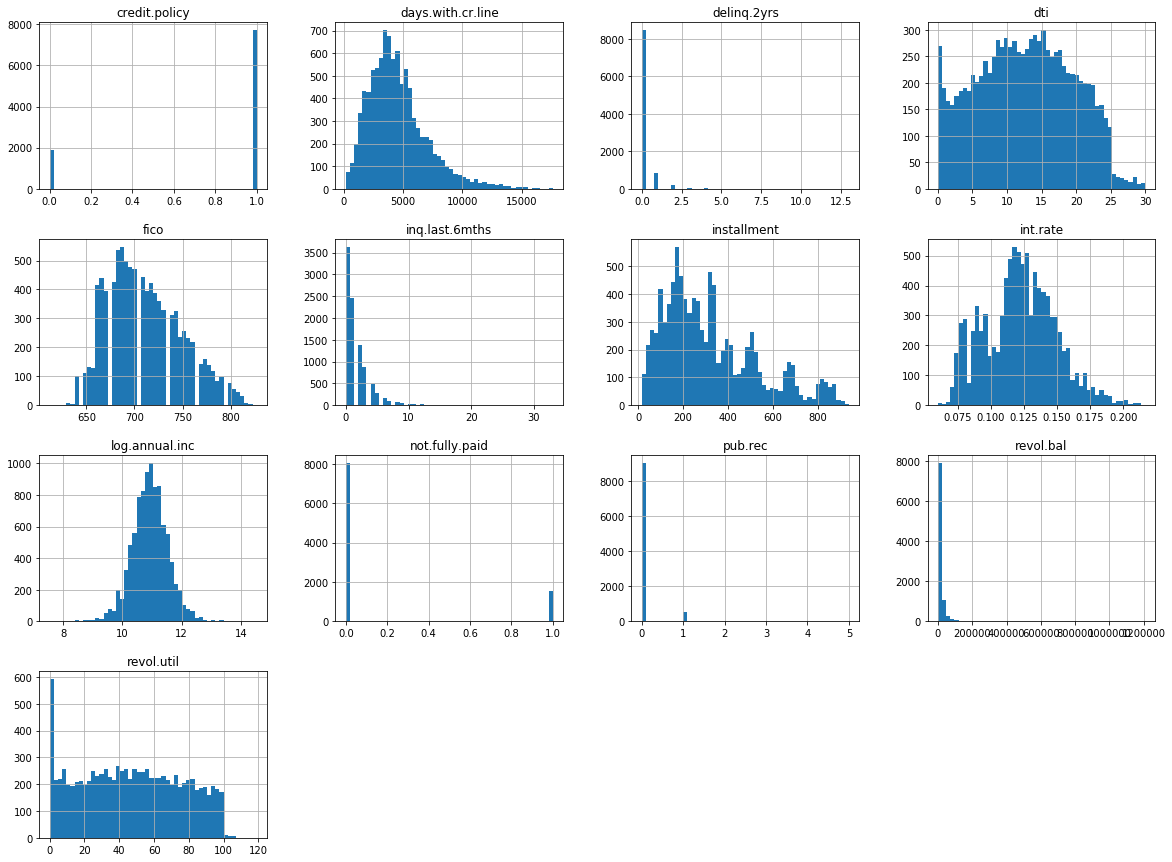

In [15]:
data.hist(bins=50, figsize=(20,15))
plt.show()

#### Check correlation between the features 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023303F4E248>,
      dtype=object)

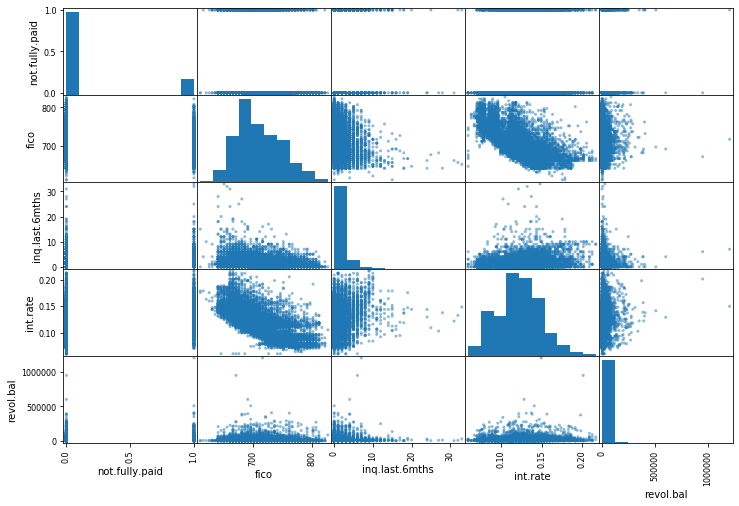

In [16]:

from pandas.plotting import scatter_matrix
attributes = ["not.fully.paid","fico", "inq.last.6mths", "int.rate",
              "revol.bal"]
scatter_matrix(data[attributes], figsize=(12, 8))

#### compute the correlation between the features  and the target

In [17]:
data.corr()['not.fully.paid'].sort_values(ascending = False)

not.fully.paid       1.000000
int.rate             0.159552
inq.last.6mths       0.149452
revol.util           0.082088
revol.bal            0.053699
installment          0.049955
pub.rec              0.048634
dti                  0.037362
delinq.2yrs          0.008881
days.with.cr.line   -0.029237
log.annual.inc      -0.033439
fico                -0.149666
credit.policy       -0.158119
Name: not.fully.paid, dtype: float64

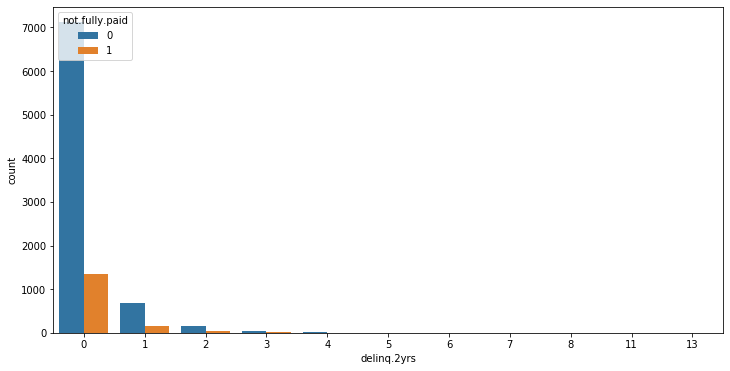

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='delinq.2yrs' ,hue="not.fully.paid")

In [19]:
data[data['not.fully.paid'] == 1]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
57,1,credit_card,0.1343,678.08,11.884489,10.15,682,4209.958333,41674,74.1,0,0,0,1
65,1,all_other,0.1059,32.55,10.433822,14.47,687,1110.000000,4485,36.9,1,0,0,1
73,1,small_business,0.1501,225.37,12.269047,6.45,677,6240.000000,56411,75.3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


## Prepare the Data for Machine Learning Algorithms

### (1) Handling imbalanced 
#### there are 3 ways to handing this problem (1) under-sampling (2) over-sampling (3) smote 

#### under-sampling

In [20]:
datacopy =data
no_frauds = len(datacopy[datacopy['not.fully.paid'] == 1])
non_fraud_indices = datacopy[datacopy["not.fully.paid"] == 0].index
random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
fraud_indices = datacopy[datacopy["not.fully.paid"] == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = datacopy.loc[under_sample_indices]
# X_under = under_sample.drop('not.fully.paid',axis = 1)
# y_under = under_sample['not.fully.paid']
print(len(under_sample[under_sample['not.fully.paid'] == 1]))
print(len(under_sample[under_sample['not.fully.paid'] == 0]))


1533
1533


### over-sampling

In [21]:
from imblearn.over_sampling import RandomOverSampler

In [22]:
mydata = data
ros = RandomOverSampler(sampling_strategy=1)
X = mydata.drop('not.fully.paid',axis =1)
y = mydata['not.fully.paid']

x_ros , y_ros = ros.fit_resample(X,y)

targetdata = pd.DataFrame(y_ros,columns=['not.fully.paid'])

finaldata = pd.concat([x_ros,targetdata],axis=1)

# print(len(finaldata))
# print(len(x_ros))
len(finaldata)
Counter(finaldata['not.fully.paid'])


Counter({0: 8045, 1: 8045})

##### 0 indicated to no sampling
##### 1 indicated to undersampling
##### 2 indicated to oversampling


In [23]:
typeofsampling = int(input('type'))
if typeofsampling == 0:
    data_aftersampling = data
elif typeofsampling == 1:
    data_aftersampling = under_sample
elif typeofsampling == 2:
    data_aftersampling = finaldata

type2


#### (2) Handling Categorical attributes

In [24]:
data_lab = data_aftersampling['not.fully.paid']
data_lab

0        0
1        0
2        0
3        0
4        0
        ..
16085    1
16086    1
16087    1
16088    1
16089    1
Name: not.fully.paid, Length: 16090, dtype: int64

In [25]:
data_num = data_aftersampling.drop(['purpose','not.fully.paid'],axis=1)

In [26]:
data_cat = data_aftersampling[['purpose']]
data_cat.head(10)

,purpose
0,debt_consolidation
1,credit_card
2,debt_consolidation
3,debt_consolidation
4,credit_card
5,credit_card
6,debt_consolidation
7,all_other
8,home_improvement
9,debt_consolidation


#### we will convert categorical column to a numerical column using onehotencoder built in function by sklearn

In [27]:
cat_encoder = OneHotEncoder()
data_cat_hot = cat_encoder.fit_transform(data_cat)
data_cat_hot

<16090x7 sparse matrix of type '<class 'numpy.float64'>'
	with 16090 stored elements in Compressed Sparse Row format>

In [28]:
data_cat_hot.toarray()

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

### (3) Transformation PipeLines 
####  first handling numerical columns with standardization , applying  pipeline to implement what we have done to categorical columns using onehotencoder


In [29]:
num_pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])
data_num_tr = num_pipeline.fit_transform(data_num)

In [30]:
num_attrs = list(data_num)
cat_attrs = ['purpose']

fullpipeline = ColumnTransformer([
    ('num',num_pipeline,num_attrs),
    ('cat',OneHotEncoder(),cat_attrs)
])


In [31]:
data_prepared = fullpipeline.fit_transform(data_aftersampling)


## Model


In [32]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import SGDClassifier
X_train, X_test, y_train, y_test = train_test_split(data_prepared,data_lab,test_size = 0.2, random_state = 0)


lin = RandomForestClassifier()
lin.fit(X_train,y_train)
y_pred =lin.predict(X_test)

len(y_test)


3218

In [33]:
some_data = data.iloc[:5]
some_data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [34]:
some_labels = data_lab.iloc[:5]
some_labels

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

In [35]:
some_data_prepered = fullpipeline.transform(some_data)
some_data_prepered

array([[ 0.57701537, -0.2762834 ,  2.35066951,  0.68623488,  0.95701701,
         0.84803877,  0.46510406,  0.23957279,  0.1085836 , -0.73840772,
        -0.31601016, -0.26735787,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.57701537, -0.7192587 , -0.45793028,  0.26691645,  0.20825407,
         0.03300977, -0.70700474,  0.34979323,  0.94884367, -0.73840772,
        -0.31601016, -0.26735787,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.57701537,  0.35439331,  0.19009307, -0.84076326, -0.17550498,
        -0.64618106,  0.08662207, -0.34615097, -0.79657461, -0.34610195,
        -0.31601016, -0.26735787,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.57701537, -0.95576246, -0.76586291,  0.68623488, -0.6847792 ,
         0.16884794, -0.73144099,  0.35081015,  0.82929447, -0.34610195,
        -0.316

In [36]:
print("prediction" , lin.predict(some_data_prepered))
print("Some Lables" , list(some_labels))

from sklearn.model_selection import cross_val_predict

aaaa = cross_val_predict(lin , X_train , y_train , cv=3)

prediction [0 0 0 0 0]
Some Lables [0, 0, 0, 0, 0]


In [37]:
confusion_matrix(y_train,aaaa)

array([[5855,  582],
       [ 256, 6179]], dtype=int64)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1608
           1       0.97      0.99      0.98      1610

    accuracy                           0.98      3218
   macro avg       0.98      0.98      0.98      3218
weighted avg       0.98      0.98      0.98      3218



In [39]:
accuracy_score(y_test,y_pred)

0.9810441267868241